In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        path=os.path.join(dirname, filename)

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
import os 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from sklearn.linear_model import LinearRegression
import missingno as msno
import matplotlib.pyplot as plt
import pylab 
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator

In [182]:
!pip install lasio

In [183]:
!pip install missingno

# 1. Data import and cleaning

In [184]:
import lasio
las = lasio.read(path)

In [185]:
df = las.df()
 

# convert to a data frame
df['DEPT'] = df.index
df


,AVTX,BVTX,CILD,CNDL,CNLS,CNPOR,CNSS,GR,LSPD,LTEN,...,MI,MN,ITT,DT,SPOR,DCAL,RHOB,RHOC,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,,,,,,,
195.0,0.0,0.0,0.0,26.4700,33.6237,33.6237,36.2265,74.6573,-91.50,605.4985,...,0.8857,0.1488,0.0,271.2051,158.1366,3.2576,2.1956,0.0015,30.0829,195.0
195.5,0.0,0.0,0.0,22.3399,30.5414,30.5414,33.0535,75.4569,-91.50,604.8134,...,0.8884,0.1548,0.0,268.7420,156.3946,3.2574,2.1990,0.0040,29.8808,195.5
196.0,0.0,0.0,0.0,21.4375,29.9558,29.9558,32.4553,75.7853,-91.50,604.4182,...,0.8905,0.1598,0.0,266.9755,155.1454,3.2572,2.2002,0.0030,29.8121,196.0
196.5,0.0,0.0,0.0,24.5568,32.2824,32.2824,34.8682,72.0167,-91.62,603.3654,...,0.8907,0.1628,0.0,267.1826,155.2918,3.2573,2.2002,0.0014,29.8108,196.5
197.0,0.0,0.0,0.0,27.8221,34.8708,34.8708,37.3877,66.1658,-91.62,602.8718,...,0.8886,0.1649,0.0,269.0547,156.6158,3.2574,2.1990,0.0003,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4573.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-27.54,1251.5197,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4573.0
4573.5,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-27.54,1245.0347,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4573.5
4574.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,-27.67,1234.3610,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4574.0


CNPOR neutron porosity

RHOB bulk density

RILD deep resistivity

RILM medium resistivity

RLL3 shallow resistivity

GR Gamma Ray

Deleting some columns since they are of no use

In [186]:
df.drop(columns=['MI','MN' ,'CNSS' ,'CNLS','CNDL' ,'AVTX' ,'BVTX','LSPD' ,'LTEN' ,'DT' ,'RHOC'],axis=1,inplace=True)

### We dont need some of the columns so just directly remove them

CNPOR neutron porosity

RHOB bulk density

RILD deep resistivity

RILM medium resistivity

RLL3 shallow resistivity

GR Gamma Ray

<Axes: ylabel='DEPT'>

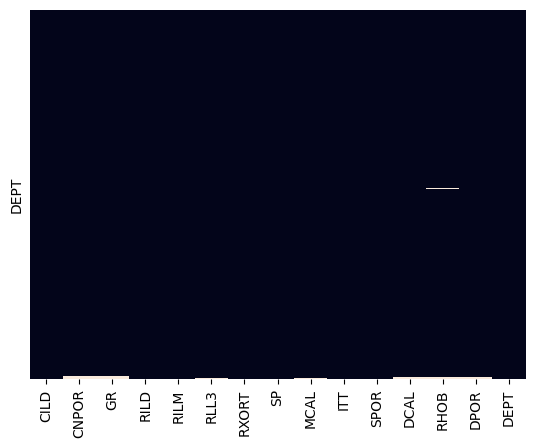

In [187]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False)

In [188]:
df.dropna(inplace=True)

<Axes: >

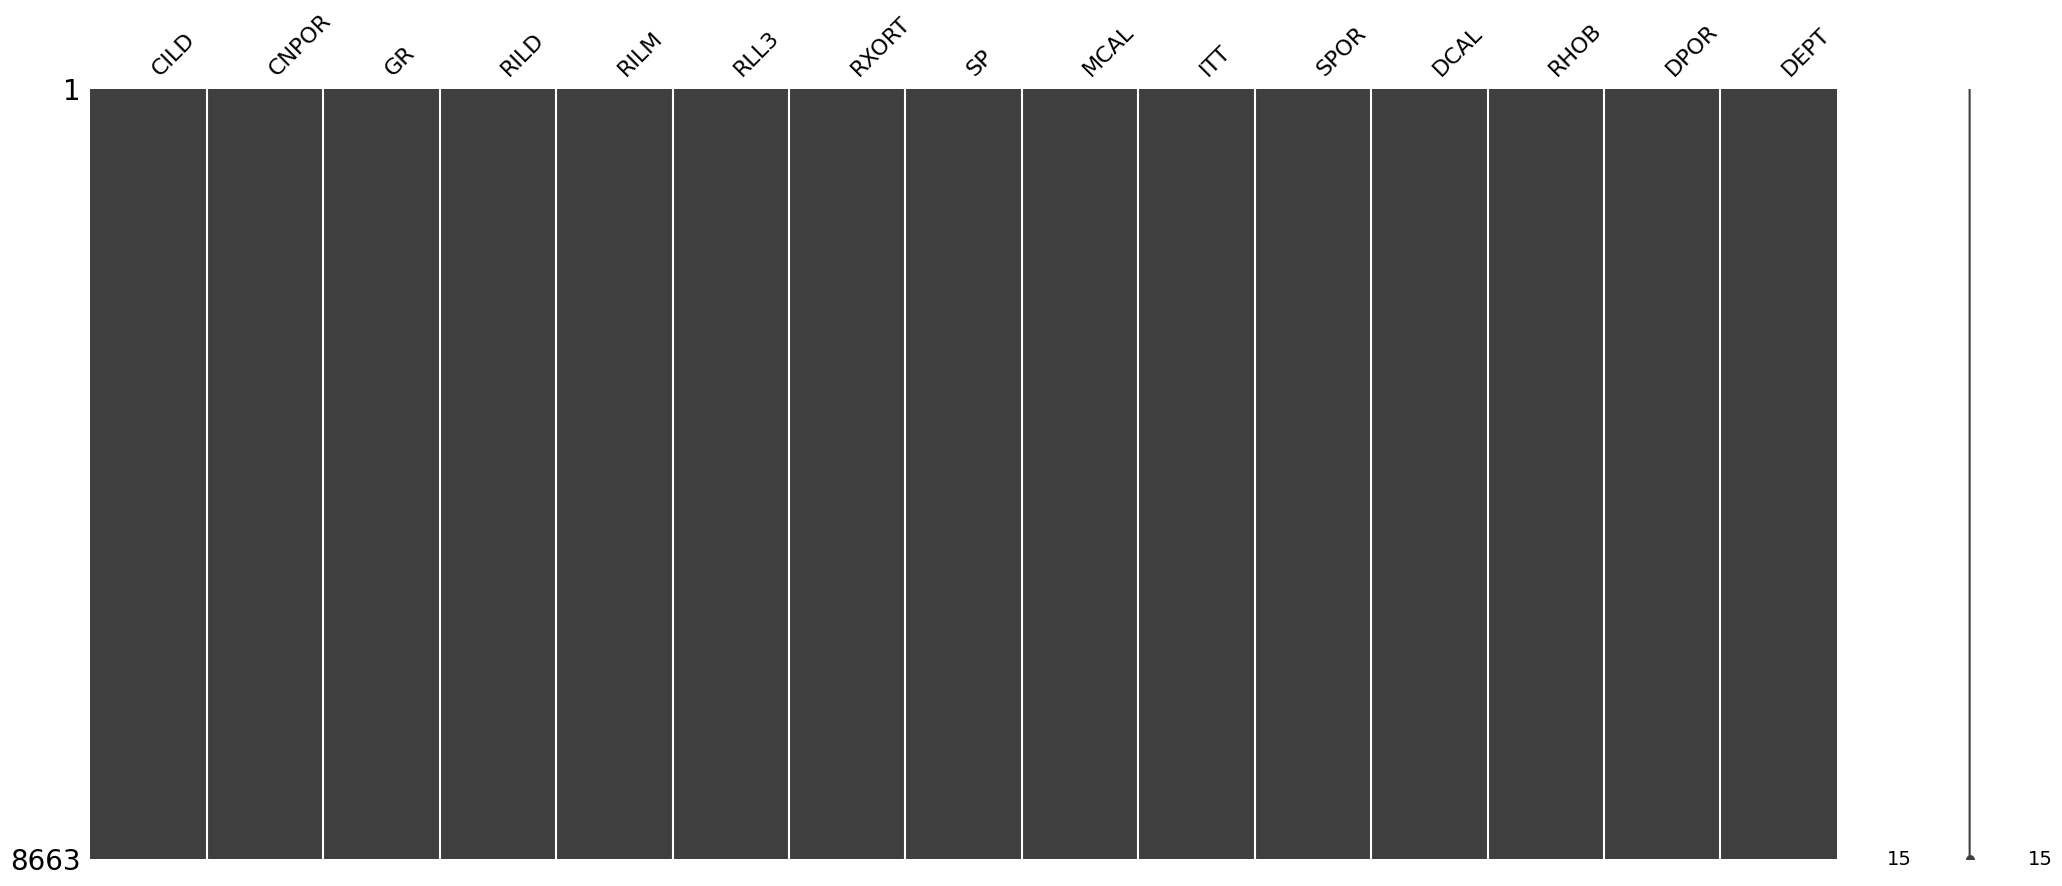

In [189]:
import missingno as msno
msno.matrix(df)

<Axes: xlabel='DEPT'>

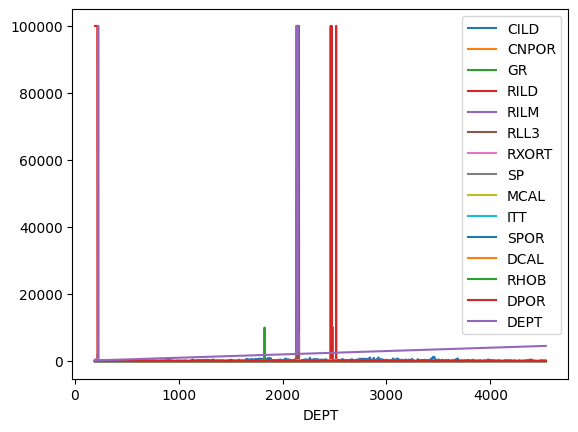

In [190]:
df.plot()

In [191]:
df.isnull().sum()

CILD     0
CNPOR    0
GR       0
RILD     0
RILM     0
RLL3     0
RXORT    0
SP       0
MCAL     0
ITT      0
SPOR     0
DCAL     0
RHOB     0
DPOR     0
DEPT     0
dtype: int64

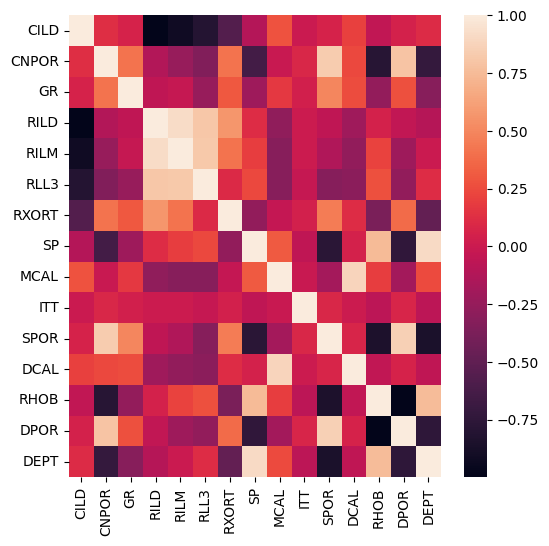

In [192]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(method='spearman'))
plt.show()

In [193]:
# fig,axes=plt.subplots(nrows=8,ncols=2)
# axes=axes.flatten()
# fig.set_size_inches(30,30)
# cols=list(df.select_dtypes(include=np.number).columns)
# for ax,col in zip(axes,cols):
#     print()
#     sns.histplot(df[col],ax=ax)
#     ax.set_title(col)

1. min values of each column

In [194]:
for col in df.columns:
    minn=min(df[col])
    print(f"Min value in column {col} is ", minn)

Min value in column CILD is  0.0
Min value in column CNPOR is  -34.6393
Min value in column GR is  -100.3876
Min value in column RILD is  0.4689
Min value in column RILM is  0.8518
Min value in column RLL3 is  0.4939
Min value in column RXORT is  -141.2022
Min value in column SP is  -246.3245
Min value in column MCAL is  -8.1987
Min value in column ITT is  0.0
Min value in column SPOR is  -0.4709
Min value in column DCAL is  3.2536
Min value in column RHOB is  -2.4718
Min value in column DPOR is  -15.0963
Min value in column DEPT is  195.0


In [195]:
# 2. max values of each column

for col in df.columns:
    maxx=max(df[col])
    print(f"Max value in column {col} is ", maxx)

Max value in column CILD is  2132.7646
Max value in column CNPOR is  66.1159
Max value in column GR is  10000.0
Max value in column RILD is  100000.0
Max value in column RILM is  100000.0
Max value in column RLL3 is  2422.9404
Max value in column RXORT is  477.5094
Max value in column SP is  -30.9765
Max value in column MCAL is  16.114
Max value in column ITT is  2.0
Max value in column SPOR is  164.2851
Max value in column DCAL is  11.8673
Max value in column RHOB is  20.2849
Max value in column DPOR is  86.8386
Max value in column DEPT is  4533.0


In [196]:
# 3. avg values of each column

for col in df.columns:
    avg=0
    for val in df[col]:
        avg+=val
    avg/=len(df[col])
    print(f"Mean value in column {col} is ", avg)

Mean value in column CILD is  238.39055016737865
Mean value in column CNPOR is  23.071778413944354
Mean value in column GR is  81.03238861826199
Mean value in column RILD is  1258.589085743974
Mean value in column RILM is  427.54290020777944
Mean value in column RLL3 is  20.543666189541742
Mean value in column RXORT is  -9.113089610989277
Mean value in column SP is  -157.72816770172
Mean value in column MCAL is  8.35743368348148
Mean value in column ITT is  0.07676324598868753
Mean value in column SPOR is  31.5611517026434
Mean value in column DCAL is  8.584373715802824
Mean value in column RHOB is  2.3550807226134087
Mean value in column DPOR is  20.90478961098927
Mean value in column DEPT is  2364.3524183308323


In [197]:
# 4 Mode 

mode=0
for col in df.columns:
    mode=df[col].mode()[0]
    print(f"Mode for the column {col} is: ",mode)

Mode for the column CILD is:  0.0
Mode for the column CNPOR is:  24.5909
Mode for the column GR is:  31.3332
Mode for the column RILD is:  100000.0
Mode for the column RILM is:  100000.0
Mode for the column RLL3 is:  0.4959
Mode for the column RXORT is:  -45.2032
Mode for the column SP is:  -237.8707
Mode for the column MCAL is:  7.7561
Mode for the column ITT is:  0.0
Mode for the column SPOR is:  0.0904
Mode for the column DCAL is:  11.8359
Mode for the column RHOB is:  2.4081
Mode for the column DPOR is:  4.6398
Mode for the column DEPT is:  195.0


In [ ]:
# 5 Median'

median=0
for col in df.columns:
    median=df[col].median()
    print(f"Median for the column {col} is: ",median)


Median for the column CILD is:  197.6348
Median for the column CNPOR is:  24.0887
Median for the column GR is:  79.2675
Median for the column RILD is:  5.0598
Median for the column RILM is:  4.5182
Median for the column RLL3 is:  6.7961
Median for the column RXORT is:  -11.66
Median for the column SP is:  -164.8015
Median for the column MCAL is:  7.9987
Median for the column ITT is:  0.0
Median for the column SPOR is:  28.2965
Median for the column DCAL is:  8.1122
Median for the column RHOB is:  2.4064
Median for the column DPOR is:  17.7547
Median for the column DEPT is:  2365.5


In [ ]:
# 6 Standard DeviatioN


std=0
for col in df.columns:
    std=df[col].std()
    print(f"Standard Deviation for the column {col} is: ",std)

Standard Deviation for the column CILD is:  197.17891853880394
Standard Deviation for the column CNPOR is:  10.418375534912157
Standard Deviation for the column GR is:  154.150763288374
Standard Deviation for the column RILD is:  11095.038112046781
Standard Deviation for the column RILM is:  6433.6550956843
Standard Deviation for the column RLL3 is:  98.6555423883678
Standard Deviation for the column RXORT is:  47.42202608670608
Standard Deviation for the column SP is:  62.64741893650774
Standard Deviation for the column MCAL is:  1.1060685539916608
Standard Deviation for the column ITT is:  0.29029408917559607
Standard Deviation for the column SPOR is:  20.611392818095624
Standard Deviation for the column DCAL is:  1.1286479230336697
Standard Deviation for the column RHOB is:  0.38134830896441685
Standard Deviation for the column DPOR is:  14.852372959556732
Standard Deviation for the column DEPT is:  1252.252236894785


In [ ]:
# 7 Variance

var=0
for col in df.columns:
    std=df[col].std()
    var=std**2
    print(f"Variance for the column {col} is: ",var)

Variance for the column CILD is:  38879.52591613228
Variance for the column CNPOR is:  108.54254878645617
Variance for the column GR is:  23762.457822388315
Variance for the column RILD is:  123099870.7077706
Variance for the column RILM is:  41391917.89022456
Variance for the column RLL3 is:  9732.916043943036
Variance for the column RXORT is:  2248.848558168232
Variance for the column SP is:  3924.6990994063085
Variance for the column MCAL is:  1.2233876461292035
Variance for the column ITT is:  0.08427065821028892
Variance for the column SPOR is:  424.8295139018439
Variance for the column DCAL is:  1.2738461341682163
Variance for the column RHOB is:  0.14542653275002032
Variance for the column DPOR is:  220.592982529772
Variance for the column DEPT is:  1568135.6648079928


In [ ]:
df=df[df['RILD']>=0]
df=df[df['CNPOR']>=0]
df=df[df['RLL3']>=0]
df=df[df['RHOB']>=0]
df=df[df['GR']>=0]
df


,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


In [ ]:
#Cannot be done
# for col in df.columns:
#     df[col]=np.where(df[col]>600,np.nan,df[col])

# 2. Data Visualization

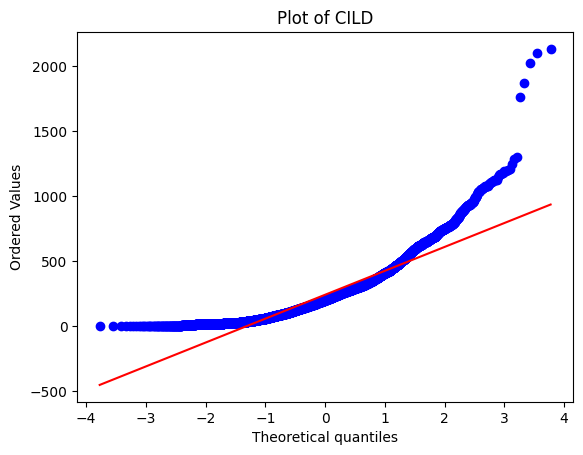

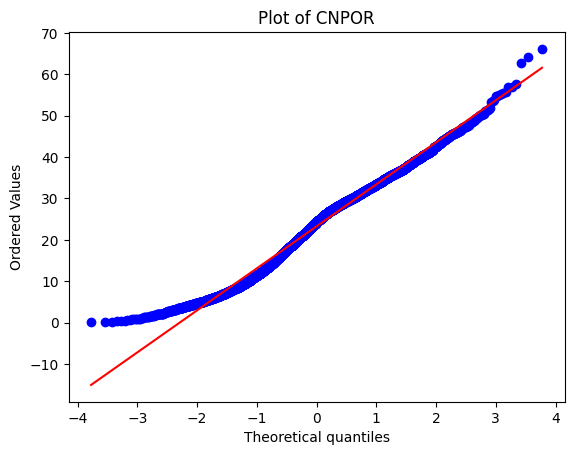

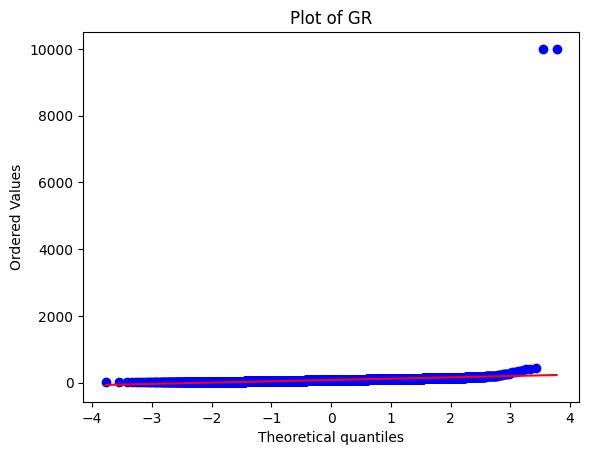

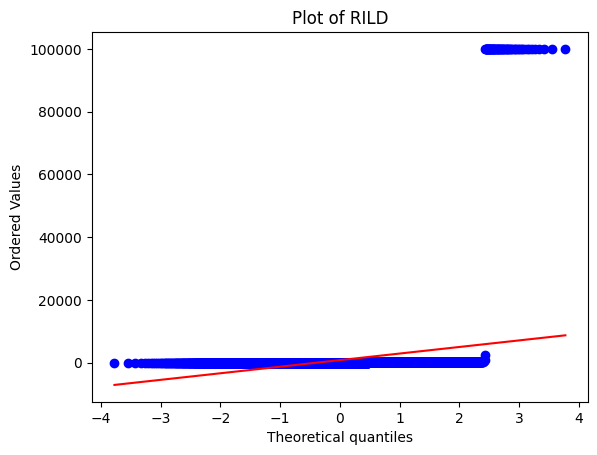

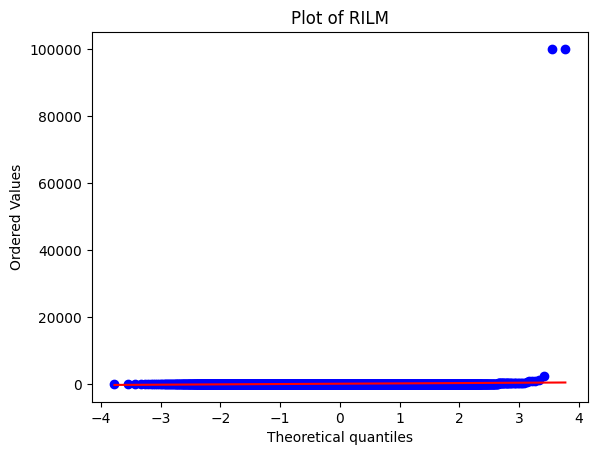

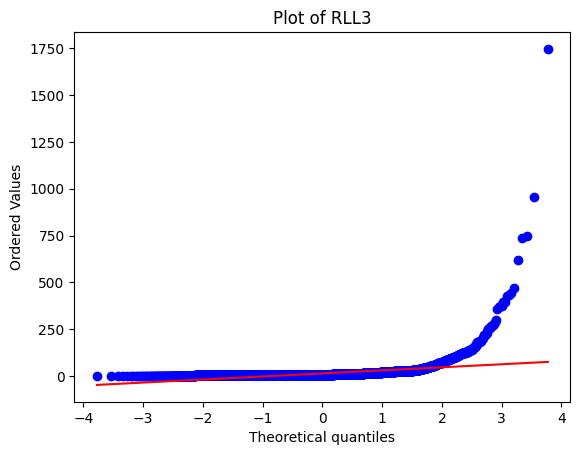

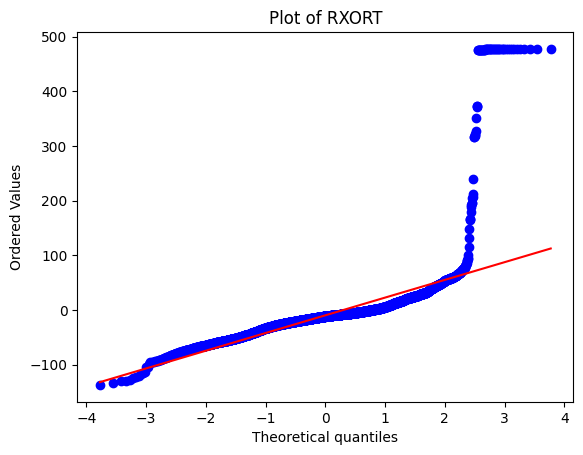

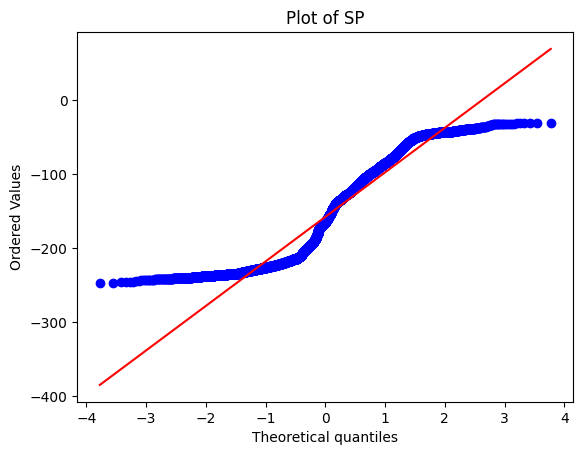

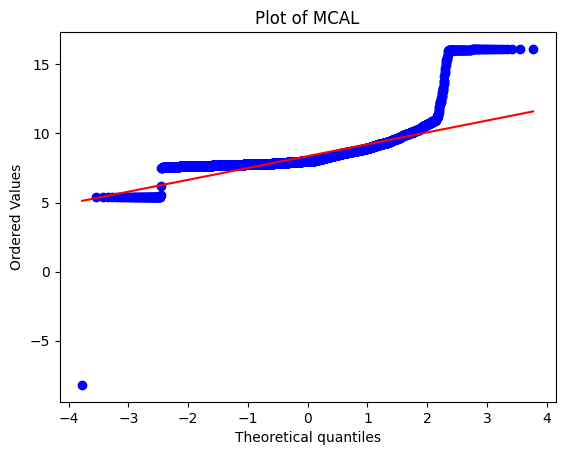

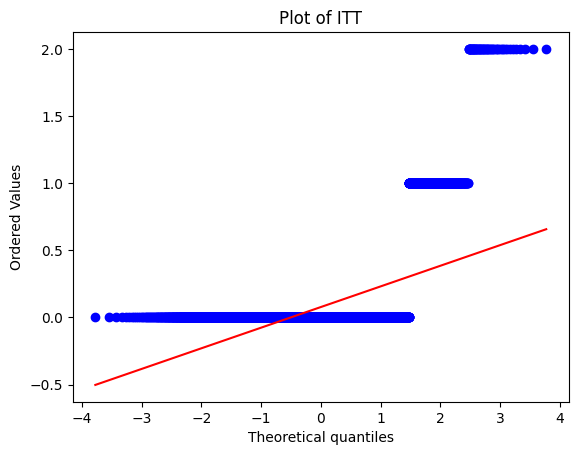

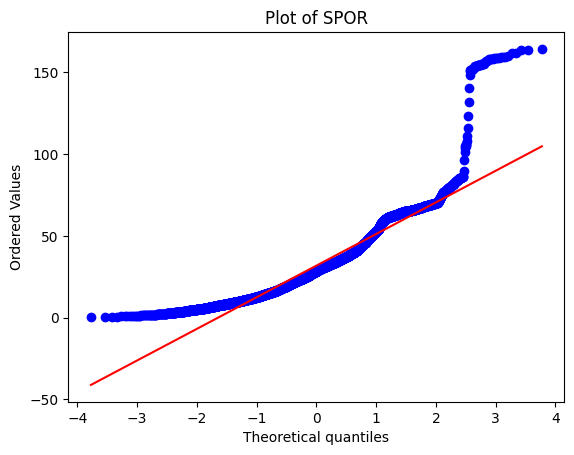

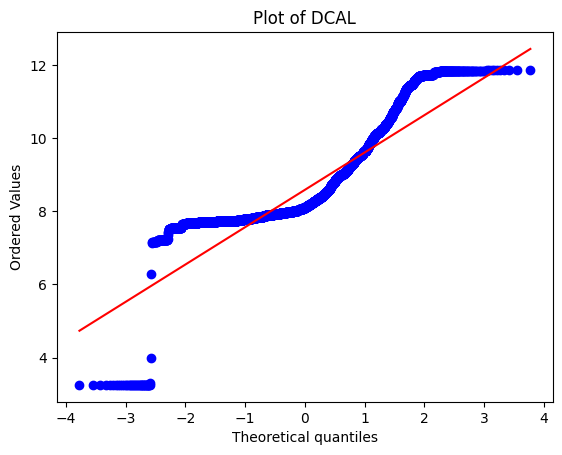

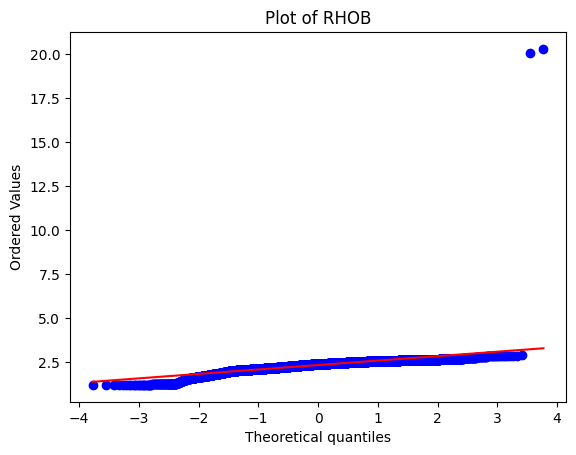

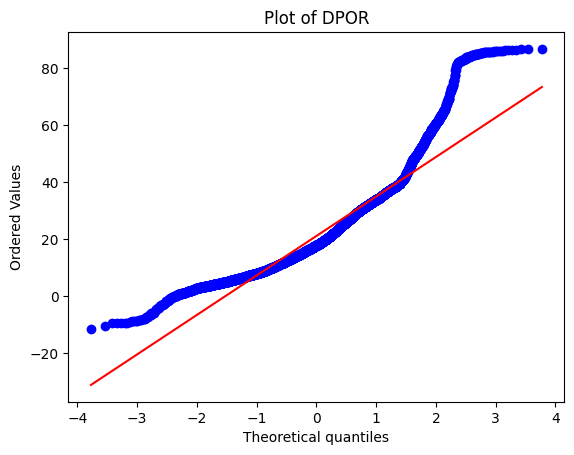

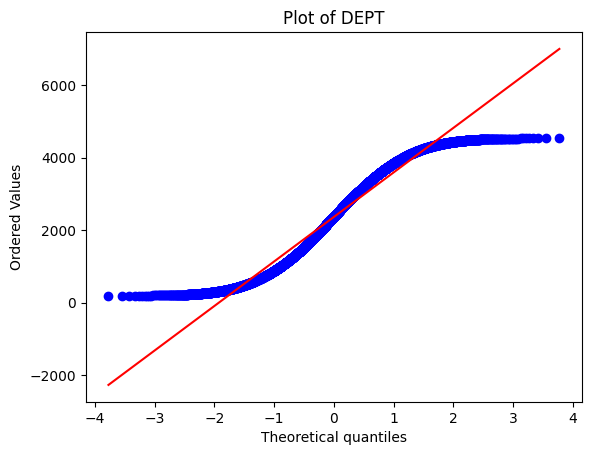

In [ ]:

for col in df.columns:
    stats.probplot(df[col], dist="norm", plot=pylab)
   
    plt.title(f'Plot of {col}')
    pylab.show()


KeyboardInterrupt



Error in callback <function _draw_all_if_interactive at 0x7ea9a5d0d900> (for post_execute):



KeyboardInterrupt



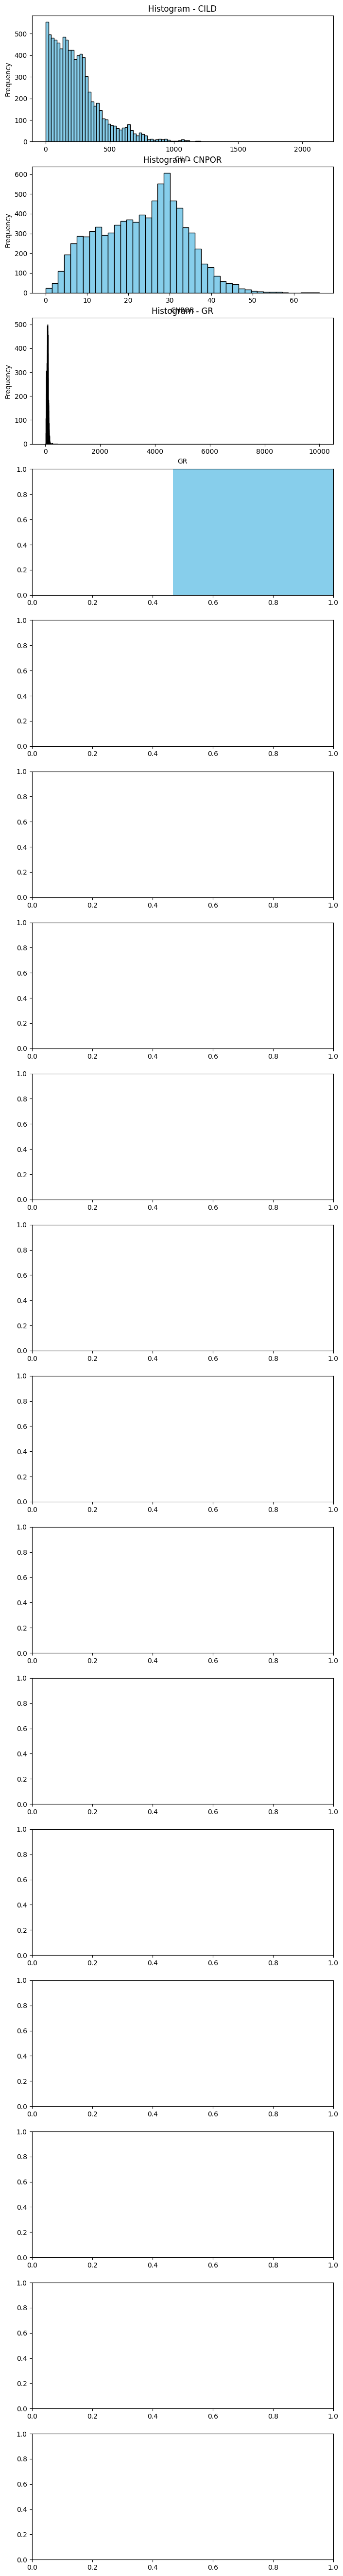

In [227]:
# Uncomment and run it ..Its taking time .


fig, axes = plt.subplots(nrows=len(df.columns), ncols=1, figsize=(8, 4 * len(df.columns)))

for i, col in enumerate(df.columns):
    axes[i].hist(df[col], bins='auto', color='skyblue', edgecolor='black')
    axes[i].set_title(f'Histogram - {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

In [ ]:
## For visualization
new_df=df
# convert to a data frame
new_df['DEPT'] = new_df.index

In [ ]:
DF = new_df.copy()


In [ ]:
DF

,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


In [ ]:
import numpy as np
DF = new_df.copy()
#DF.drop(DF[DF['GR'] >= 160].index, inplace = True)
#DF.drop(DF[DF['GR'] <= 0].index, inplace = True)

logi=DF["GR"]<=0

np.sum(logi)

DF.loc[logi,"GR"]=np.nan

logi=DF["GR"]>= 160

np.sum(logi)

DF.loc[logi,"GR"]=np.nan

In [ ]:
DF

,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


In [ ]:
DF.isnull().sum()

CILD      0
CNPOR     0
GR       86
RILD      0
RILM      0
RLL3      0
RXORT     0
SP        0
MCAL      0
ITT       0
SPOR      0
DCAL      0
RHOB      0
DPOR      0
DEPT      0
dtype: int64

In [ ]:
DF.dropna(inplace=True)

In [ ]:
DF


,CILD,CNPOR,GR,RILD,RILM,RLL3,RXORT,SP,MCAL,ITT,SPOR,DCAL,RHOB,DPOR,DEPT
DEPT,,,,,,,,,,,,,,,
195.0,0.0000,33.6237,74.6573,100000.0000,102.4693,0.4966,477.3602,-199.2600,5.3710,0.0,158.1366,3.2576,2.1956,30.0829,195.0
195.5,0.0000,30.5414,75.4569,100000.0000,104.1353,0.4962,477.3797,-198.3053,5.3718,0.0,156.3946,3.2574,2.1990,29.8808,195.5
196.0,0.0000,29.9558,75.7853,100000.0000,101.5104,0.4959,477.3945,-197.1277,5.3776,0.0,155.1454,3.2572,2.2002,29.8121,196.0
196.5,0.0000,32.2824,72.0167,100000.0000,95.1067,0.4960,477.4019,-195.9910,5.3775,0.0,155.2918,3.2573,2.2002,29.8108,196.5
197.0,0.0000,34.8708,66.1658,100000.0000,86.3613,0.4961,477.4013,-195.3299,5.3726,0.0,156.6158,3.2574,2.1990,29.8815,197.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4531.0,34.9168,5.7661,27.0650,28.6395,42.6085,98.4967,-46.0816,-58.0977,7.7581,0.0,4.7544,7.1496,2.5607,8.7294,4531.0
4531.5,28.3953,5.7760,26.9819,35.2171,53.6845,112.7332,-43.3178,-56.0571,7.7440,0.0,4.6080,7.1504,2.5787,7.6763,4531.5
4532.0,23.1745,5.6534,26.6880,43.1509,66.0023,120.8478,-38.9684,-54.0713,7.7310,0.0,4.5308,7.1504,2.6024,6.2927,4532.0


<Axes: >

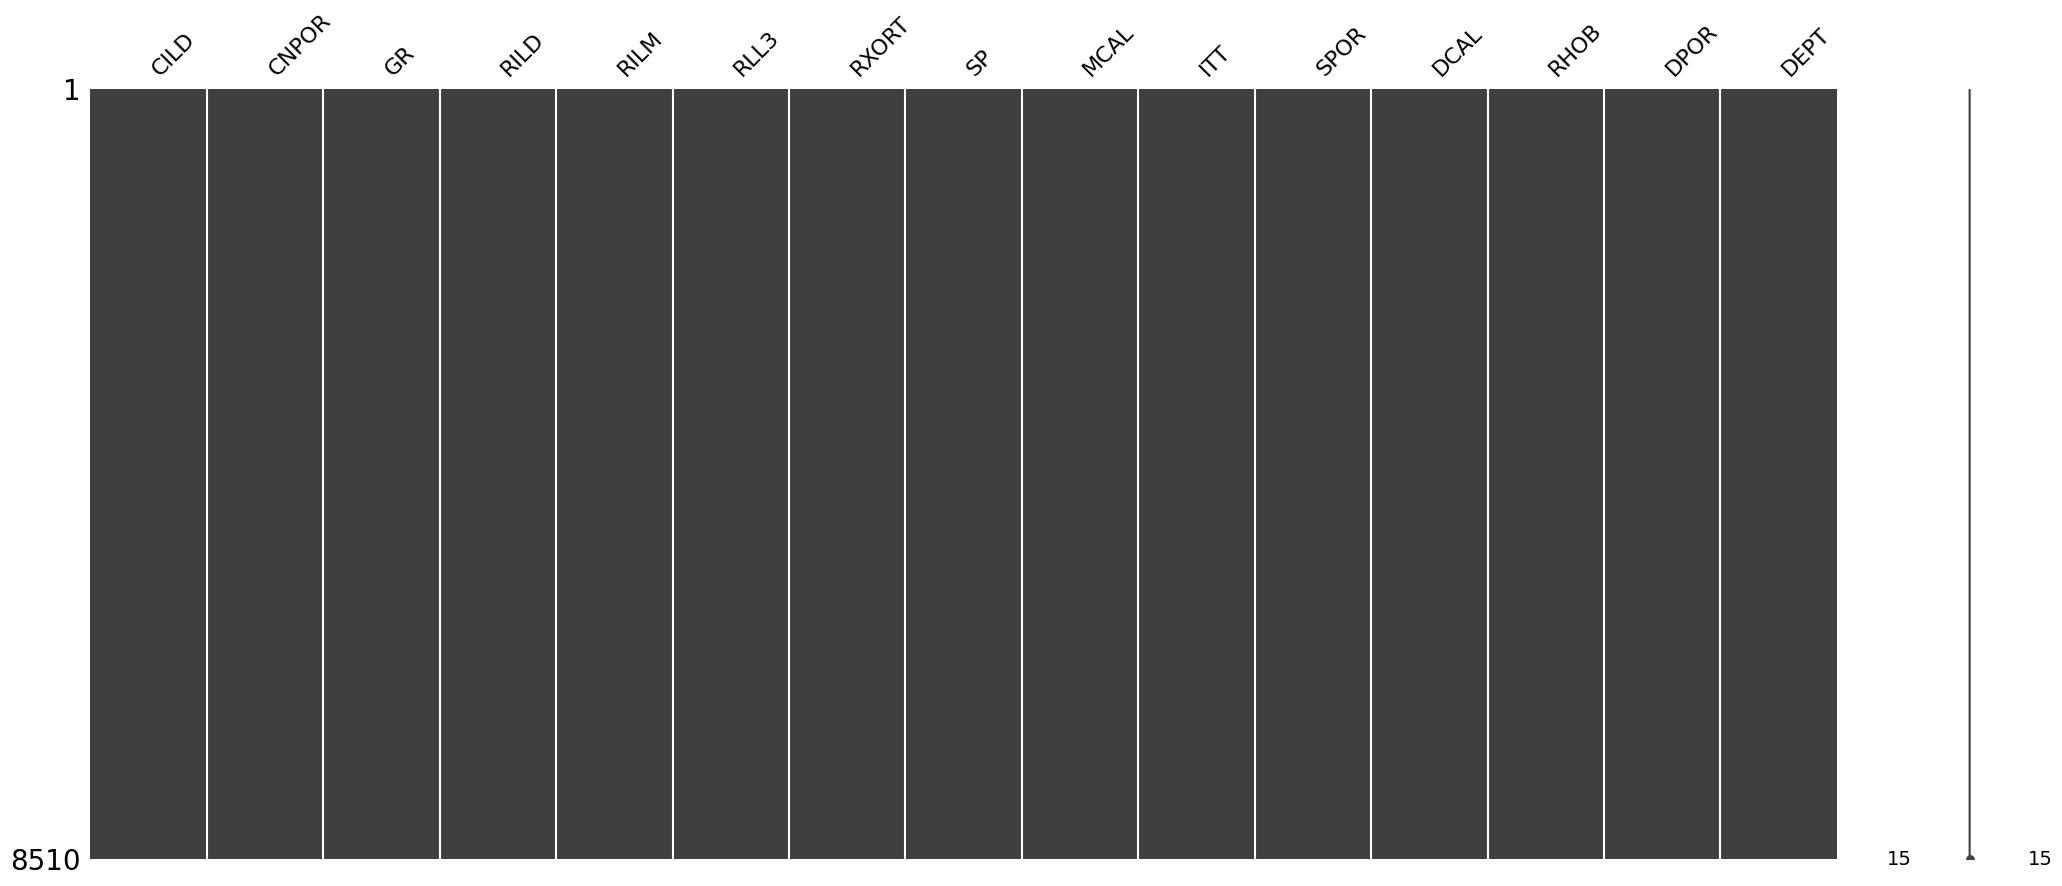

In [ ]:
msno.matrix(DF)

In [ ]:
# import missingno as msn
# def well_log_display(df, column_depth, column_list,
#                      column_semilog=None, min_depth=None, max_depth=None,
#                      column_min=None, column_max=None, colors=None,
#                      fm_tops=None, fm_depths=None,
#                      tight_layout=1, title_size=10):
#   """
#   Display log side-by-side style
#   Input:
#   df is your dataframe
#   specify min_depth and max_depth as the upper and lower depth limit
#   column_depth is the column name of your depth
#   column_list is the LIST of column names that you will display
#   column_semilog is specific for resistivity column; if your resistivities are
#     in column 3, specify as: column_semilog=2. Default is None, so if you don't
#     specify, the resistivity will be plotted in normal axis instead
   
#   column_min is list of minimum values for the x-axes.
#   column_max is list of maximum values for the x-axes.
 
#   colors is the list of colors specified for each log names. Default is None,
#     so if don't specify, the colors will be Matplotlib default (blue)
#   fm_tops and fm_depths are the list of formation top names and depths.
#     Default is None, so no tops are shown. Specify both lists, if you want
#     to show the tops
#   """
#   import numpy as np
#   import matplotlib.pyplot as plt
#   import pandas as pd
#   import random

#   if column_semilog==None:
#     # column semilog not defined, RT will be plotted in normal axis
#     logs = column_list

#     # create the subplots; ncols equals the number of logs
#     fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

#     # looping each log to display in the subplots
#     if colors==None:
#       # color is None (default)
#       for i in range(len(logs)):
#         # normal axis plot
#         ax[i].plot(df[logs[i]], df[column_depth])
#         ax[i].set_title(logs[i], size=title_size)
#         ax[i].minorticks_on()
#         ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
#         ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')
#         if column_min!=None and column_max!=None:
#           # x-axis limits defined
#           ax[i].set_xlim(column_min[i], column_max[i])
#         if min_depth!=None and max_depth!=None:
#           # y-axis limit defined
#           ax[i].set_ylim(min_depth, max_depth)          
#         ax[i].invert_yaxis()    

#     else:
#       # colors are defined (as list)
#       for i in range(len(logs)):
#         # normal axis plot
#         ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
#         ax[i].set_title(logs[i], size=title_size)
#         ax[i].minorticks_on()
#         ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
#         ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
#         if column_min!=None and column_max!=None:
#           # x-axis limits defined
#           ax[i].set_xlim(column_min[i], column_max[i])      
#         if min_depth!=None and max_depth!=None:
#           # y-axis limit defined
#           ax[i].set_ylim(min_depth, max_depth)          
#         ax[i].invert_yaxis()    


#   else:
#     # column semilog is defined, RT will be plotted in semilog axis
#     logs = column_list

#     # create the subplots; ncols equals the number of logs
#     fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20,10))

#     # looping each log to display in the subplots
#     if colors==None:
#       # color is None (default)
#       for i in range(len(logs)):
#         if i == column_semilog:
#           # for resistivity, semilog plot
#           ax[i].semilogx(df[logs[i]], df[column_depth])
#         else:
#           # for non-resistivity, normal plot
#           ax[i].plot(df[logs[i]], df[column_depth])
       
#         ax[i].set_title(logs[i], size=title_size)
#         ax[i].minorticks_on()
#         ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
#         ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')        
#         if column_min!=None and column_max!=None:
#           # x-axis limits defined
#           ax[i].set_xlim(column_min[i], column_max[i])        
#         if min_depth!=None and max_depth!=None:
#           # y-axis limit defined
#           ax[i].set_ylim(min_depth, max_depth)          
#         ax[i].invert_yaxis()    

#     else:
#       # colors are defined (as list)
#       for i in range(len(logs)):
#         if i == column_semilog:
#           # for resistivity, semilog plot
#           ax[i].semilogx(df[logs[i]], df[column_depth], color=colors[i])    
#         else:
#           # for non-resistivity, normal plot
#           ax[i].plot(df[logs[i]], df[column_depth], color=colors[i])
       
#         ax[i].set_title(logs[i], size=title_size)
#         ax[i].minorticks_on()
#         ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
#         ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')  
#         if column_min!=None and column_max!=None:
#           # x-axis limits defined
#           ax[i].set_xlim(column_min[i], column_max[i])  
#         if min_depth!=None and max_depth!=None:
#           # y-axis limit defined
#           ax[i].set_ylim(min_depth, max_depth)
#         ax[i].invert_yaxis()

#   if fm_tops!=None and fm_depths!=None:
#     # Formation tops and depths are specified, they will be shown

#     # produce colors
#     rgb = []
#     for j in range(len(fm_tops)):
#       _ = (random.random(), random.random(), random.random())
#       rgb.append(_)

#     for i in range(len(logs)):
#       for j in range(len(fm_tops)):
#         # rgb = (random.random(), random.random(), random.random())
#         ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])  
#         # y = fm_depths[j] / (max_depth - min_depth)    
#         # ax[i].text(0.5, y, fm_tops[j], fontsize=5, va='center', ha='center', backgroundcolor='w')

#   # plt.legend()
#   # plt.legend(loc='upper center', bbox_to_anchor=(-3, -0.05),
#   #            fancybox=True, shadow=True, ncol=5)  
 
#   plt.show() 


# column_depth = 'DEPT'
# column_list = ['GR','RILD','RHOB'] ##6logs
# column_semilog = 6
# column_min=None
# column_max=None
# min_depth= 0
# max_depth= 5000
# colors=["darkred","darkblue", "orange"]
# well_log_display(DF, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)


# column_depth = 'DEPT'
# column_list = ['CNPOR','GR','RILD','RLL3','RHOB','RHOC'] ##6logs   -Drilling fluid effect on RILD AND RIL3 - INVASION 
# column_semilog = 6
# column_min=None
# column_max=None
# min_depth= 2500
# max_depth= 2900
# colors=["darkred","darkblue", "orange", "red","purple","green"]
# well_log_display(DF, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)



In [ ]:
DF=DF[(DF['RILD']<=400 ) | DF['RILD']>=0]
DF=DF[(DF['RHOB']<=5 ) | DF['RHOB']>=0]


Shortened above code

In [ ]:
## RILD 0 TO 400
## RHOB 0 TO 5 ... ON BOTH X-AXIS


# Histogram with frequencies with each frequency

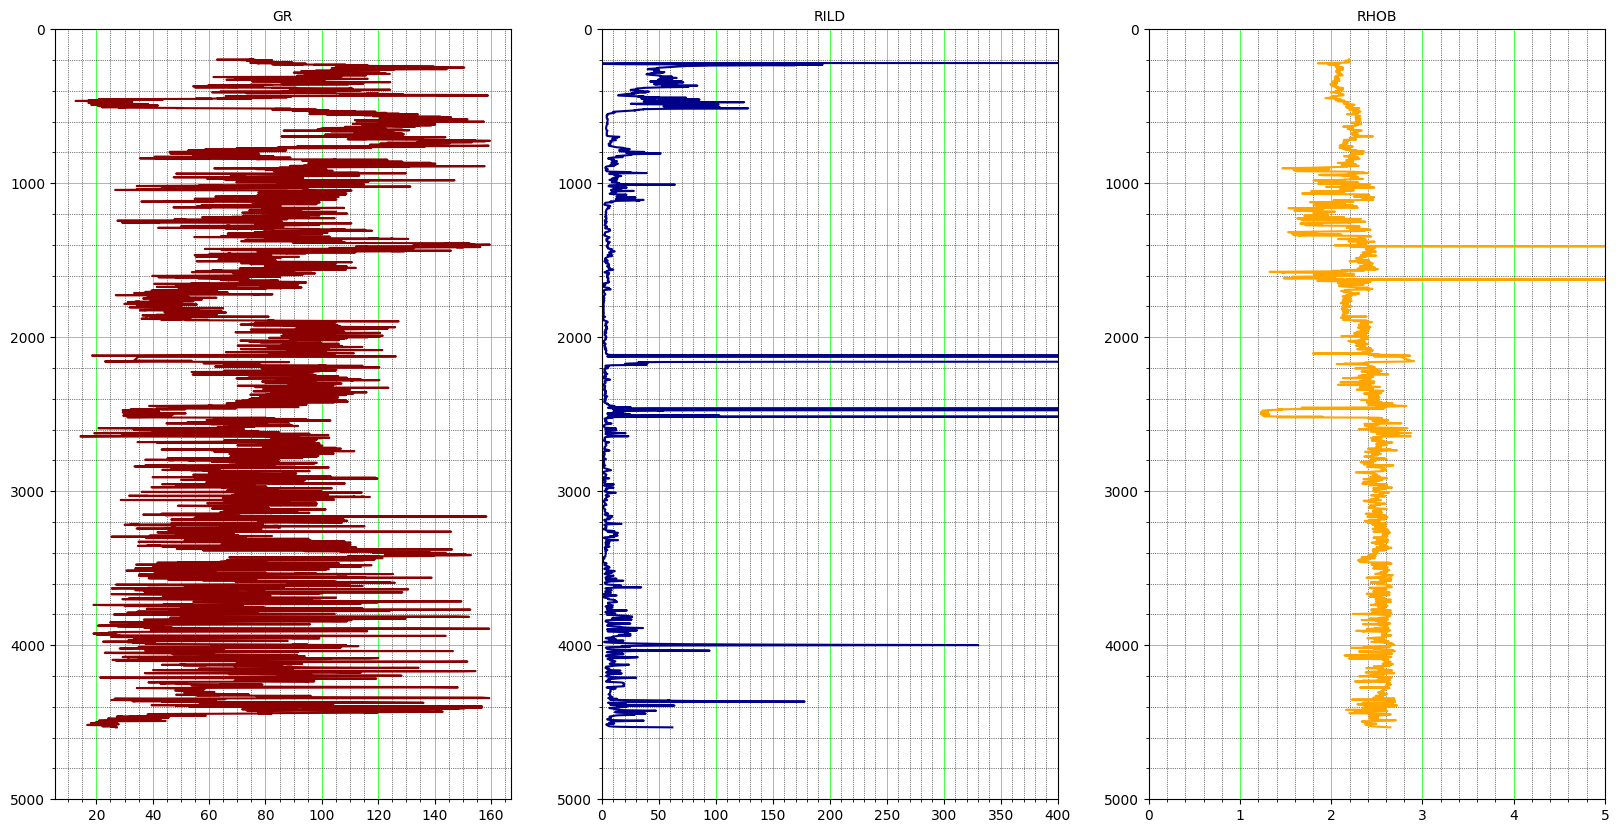

In [ ]:
import missingno as msn
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random

def well_log_display(df, col_depth, col_list, col_semilog=None, min_depth=None, max_depth=None,
                     col_min=None, col_max=None, colors=None, fm_tops=None, fm_depths=None,
                     tight_layout=1, title_size=10):
    logs = col_list
    fig, ax = plt.subplots(nrows=1, ncols=len(logs), figsize=(20, 10))

    for i in range(len(logs)):
        plot_func = ax[i].semilogx if (col_semilog is not None and i == col_semilog) else ax[i].plot

        if colors is not None:
            plot_func(df[logs[i]], df[col_depth], color=colors[i])
        else:
            plot_func(df[logs[i]], df[col_depth])

        ax[i].set_title(logs[i], size=title_size)
        ax[i].minorticks_on()
        ax[i].grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        ax[i].grid(which='minor', linestyle=':', linewidth='0.5', color='black')

        if col_min is not None and col_max is not None:
            ax[i].set_xlim(col_min[i], col_max[i])

        if min_depth is not None and max_depth is not None:
            ax[i].set_ylim(min_depth, max_depth)

        ax[i].invert_yaxis()

        # Adjust x-axis range for 'RILD' and 'RHOB'
        if logs[i] == 'RILD':
            ax[i].set_xlim(0, 400)
        elif logs[i] == 'RHOB':
            ax[i].set_xlim(0, 5)

    if fm_tops is not None and fm_depths is not None:
        rgb = [(random.random(), random.random(), random.random()) for _ in range(len(fm_tops))]
        for i in range(len(logs)):
            for j in range(len(fm_tops)):
                ax[i].axhline(y=fm_depths[j], linestyle=":", c=rgb[j], label=fm_tops[j])

    plt.show()

# Example usage:
column_depth = 'DEPT'
column_list = ['GR', 'RILD', 'RHOB']  # 6 logs
column_semilog = 6
column_min = None
column_max = None
min_depth = 0
max_depth = 5000
colors = ["darkred", "darkblue", "orange"]
well_log_display(DF, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)


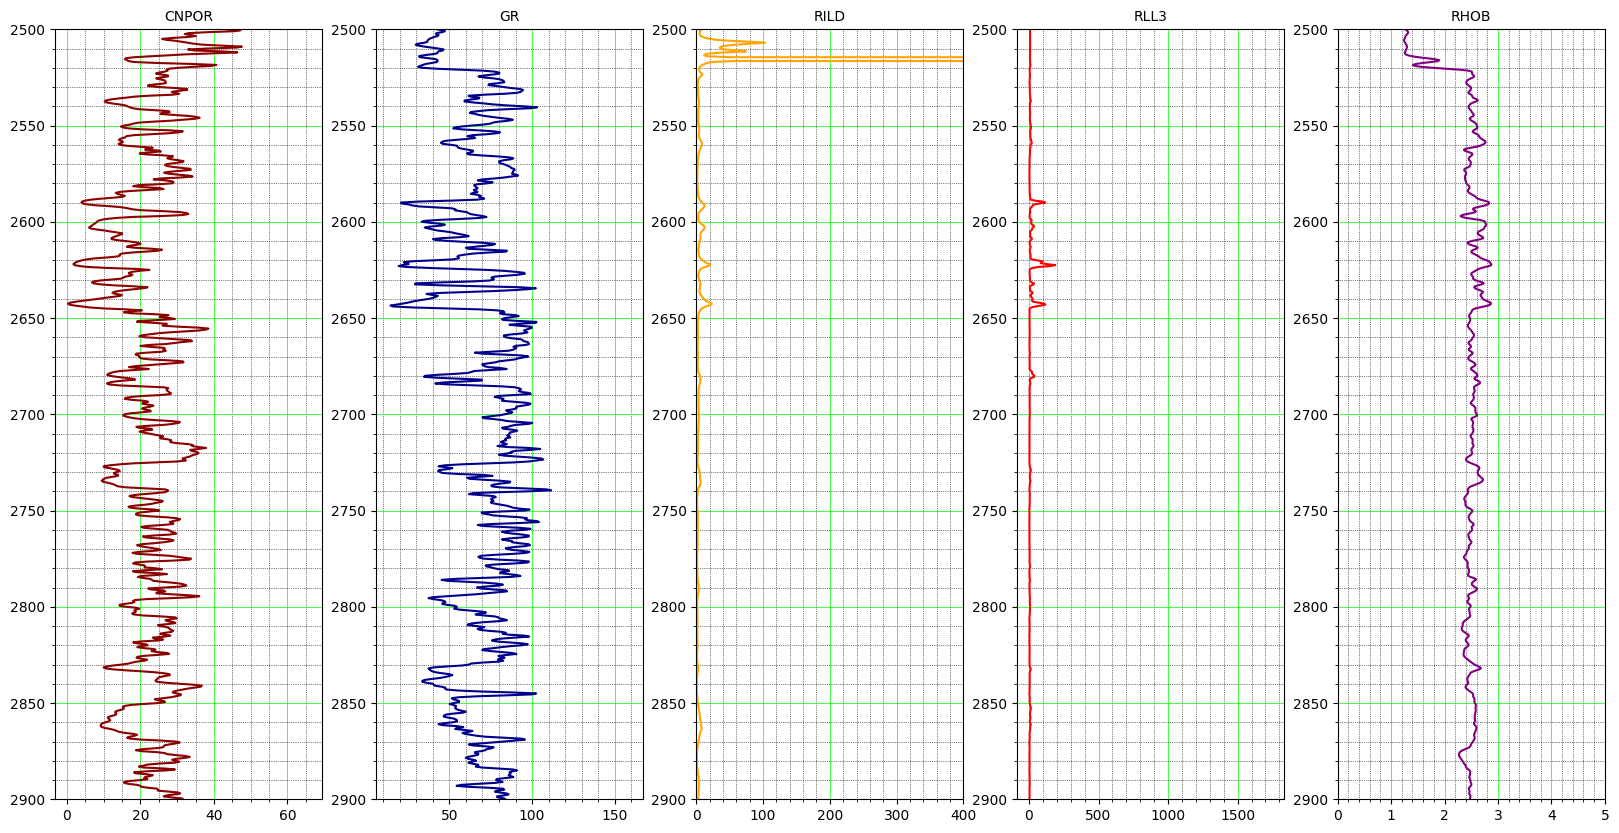

In [ ]:
column_depth = 'DEPT'
column_list = ['CNPOR','GR','RILD','RLL3','RHOB'] ##6logs   -Drilling fluid effect on RILD AND RIL3 - INVASION 
column_semilog = 6
column_min=None
column_max=None
min_depth= 2500
max_depth= 2900
colors=["darkred","darkblue", "orange", "red","purple"]
well_log_display(DF, column_depth, column_list, column_semilog, min_depth, max_depth, column_min, column_max, colors)



In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def triple_combo(df, col_depth, col_GR, col_resistivity, col_NPHI, col_RHOB,
                 min_depth, max_depth, min_GR=0, max_GR=150, sand_GR_line=60,
                 min_resistivity=0.01, max_resistivity=3000,
                 color_GR='black', color_resistivity='green',
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6, 10), tight_layout=1,
                 title_size=15, title_height=1.05):
    fig, ax = plt.subplots(1, 3, figsize=(8, 10))
    fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

    for axis in ax:
        axis.minorticks_on()
        axis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        axis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    ax[0].get_xaxis().set_visible(False)
    ax[0].invert_yaxis()

    gr = ax[0].twiny()
    gr.set_xlim(min_GR, max_GR)
    gr.set_xlabel('GR', color=color_GR)
    gr.set_ylim(max_depth, min_depth)
    gr.spines['top'].set_position(('outward', 10))
    gr.tick_params(axis='x', colors=color_GR)
    gr.plot(df[col_GR], df[col_depth], color=color_GR)

    gr.minorticks_on()
    gr.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    gr.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line >= df[col_GR]),
                     color='gold', linewidth=0)
    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line < df[col_GR]),
                     color='lime', linewidth=0)

    ax[1].get_xaxis().set_visible(False)
    ax[1].invert_yaxis()

    res = ax[1].twiny()
    res.set_xlim(min_resistivity, max_resistivity)
    res.set_xlabel('Resistivity', color=color_resistivity)
    res.set_ylim(max_depth, min_depth)
    res.spines['top'].set_position(('outward', 10))
    res.tick_params(axis='x', colors=color_resistivity)
    res.semilogx(df[col_resistivity], df[col_depth], color=color_resistivity)

    res.minorticks_on()
    res.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    res.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    ax[2].get_xaxis().set_visible(False)
    ax[2].invert_yaxis()

    nphi = ax[2].twiny()
    nphi.set_xlim(-10, 60)
    nphi.invert_xaxis()
    nphi.set_xlabel('NPHI', color='blue')
    nphi.set_ylim(max_depth, min_depth)
    nphi.spines['top'].set_position(('outward', 10))
    nphi.tick_params(axis='x', colors='blue')
    nphi.plot(df[col_NPHI], df[col_depth], color=color_NPHI)

    nphi.minorticks_on()
    nphi.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    nphi.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')

    rhob = ax[2].twiny()
    rhob.set_xlim(0, 3)
    rhob.set_xlabel('RHOB', color='red')
    rhob.set_ylim(max_depth, min_depth)
    rhob.spines['top'].set_position(('outward', 50))
    rhob.tick_params(axis='x', colors='red')
    rhob.plot(df[col_RHOB], df[col_depth], color=color_RHOB)

    x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[col_RHOB], df[col_depth]]).T
    nphi.autoscale(False)
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[col_NPHI]))
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[col_NPHI]))

    res.minorticks_on()
    res.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
    res.grid(which='minor', linestyle=':', linewidth='1', color='black')

    plt.show()


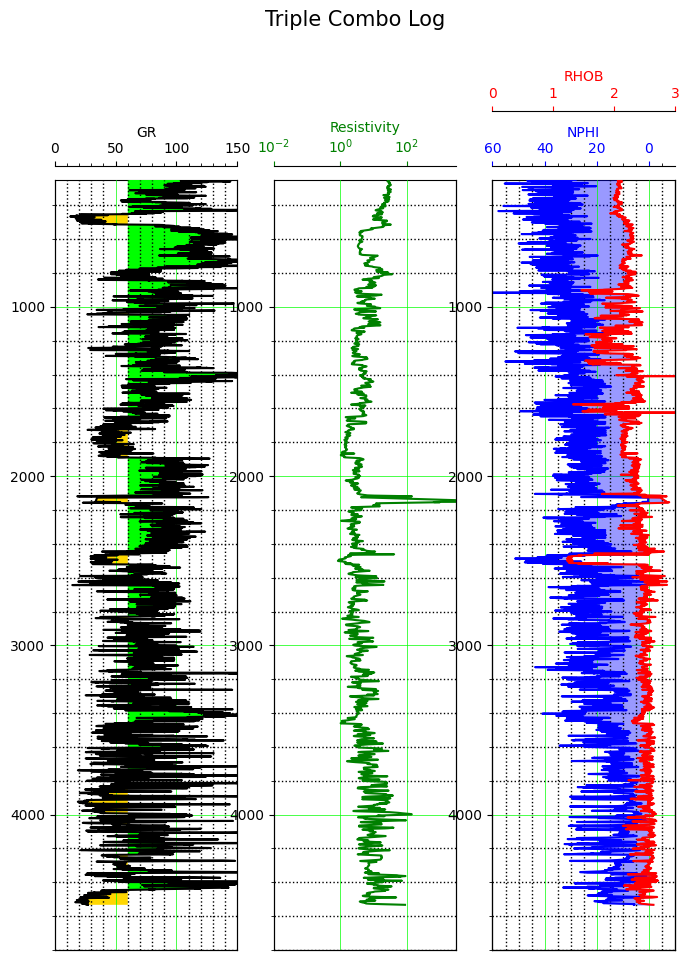

In [ ]:
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_CNPOR = 'CNPOR'
column_RHOB  = 'RHOB'
min_depth= 250
max_depth= 4800
triple_combo(DF, column_depth, column_GR, column_resistivity, column_CNPOR, column_RHOB, min_depth, max_depth)


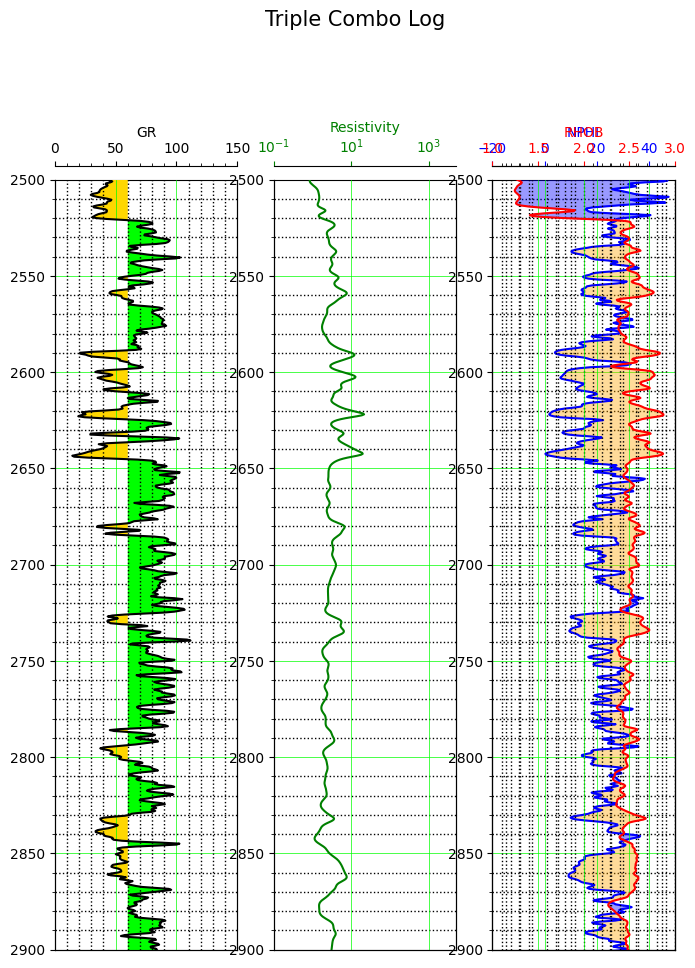

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def triple_combo(df, col_depth, col_GR, col_resistivity, 
                 col_NPHI, col_RHOB, min_depth, max_depth, 
                 min_GR=0, max_GR=150, sand_GR_line=60,
                 min_res=0.1, max_res=5000, 
                 color_GR='black', color_res='green', 
                 color_RHOB='red', color_NPHI='blue',
                 figsize=(6,10), tight_layout=1, 
                 title_size=15, title_height=1.05):

    fig, ax = plt.subplots(1, 3, figsize=(8,10))
    fig.suptitle('Triple Combo Log', size=title_size, y=title_height)

    for a in ax:
        a.minorticks_on()
        a.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        a.grid(which='minor', linestyle=':', linewidth='1', color='black')
        a.get_xaxis().set_visible(False)
        a.invert_yaxis()  

    def plot_track(ax, col_data, col_depth, col_param, col_color, min_val, max_val, log=False):
        track = ax.twiny()
        track.set_xlim(min_val, max_val)
        track.set_xlabel(col_param, color=col_color)
        track.set_ylim(max_depth, min_depth)
        track.spines['top'].set_position(('outward', 10))
        track.tick_params(axis='x', colors=col_color)
        
        if log:
            track.semilogx(df[col_data], df[col_depth], color=col_color)
        else:
            track.plot(df[col_data], df[col_depth], color=col_color)

        track.minorticks_on()
        track.xaxis.grid(which='major', linestyle='-', linewidth='0.5', color='lime')
        track.xaxis.grid(which='minor', linestyle=':', linewidth='1', color='black')  

        return track

    # First track: GR
    gr = plot_track(ax[0], col_GR, col_depth, 'GR', color_GR, min_GR, max_GR)

    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line >= df[col_GR]), color='gold', linewidth=0)
    gr.fill_betweenx(df[col_depth], sand_GR_line, df[col_GR], where=(sand_GR_line < df[col_GR]), color='lime', linewidth=0)

    # Second track: Resistivity
    res = plot_track(ax[1], col_resistivity, col_depth, 'Resistivity', color_res, min_res, max_res, log=True)

    # Third track: NPHI and RHOB
    nphi = plot_track(ax[2], col_NPHI, col_depth, 'NPHI', 'blue', -20, 50)
    rhob = plot_track(ax[2], col_RHOB, col_depth, 'RHOB', 'red', 1, 3)

    x2p, _ = (rhob.transData + nphi.transData.inverted()).transform(np.c_[df[col_RHOB], df[col_depth]]).T
    nphi.autoscale(False)
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="orange", alpha=0.4, where=(x2p > df[col_NPHI])) # hydrocarbon
    nphi.fill_betweenx(df[col_depth], df[col_NPHI], x2p, color="blue", alpha=0.4, where=(x2p < df[col_NPHI])) # water

    plt.show()

# Example usage
column_depth = 'DEPT'
column_GR = 'GR'
column_resistivity = 'RILM'
column_CNPOR = 'CNPOR'
column_RHOB = 'RHOB'
min_depth = 2500
max_depth = 2900
triple_combo(DF, column_depth, column_GR, column_resistivity, column_CNPOR, column_RHOB, min_depth, max_depth)


# 3 . Data Analysis


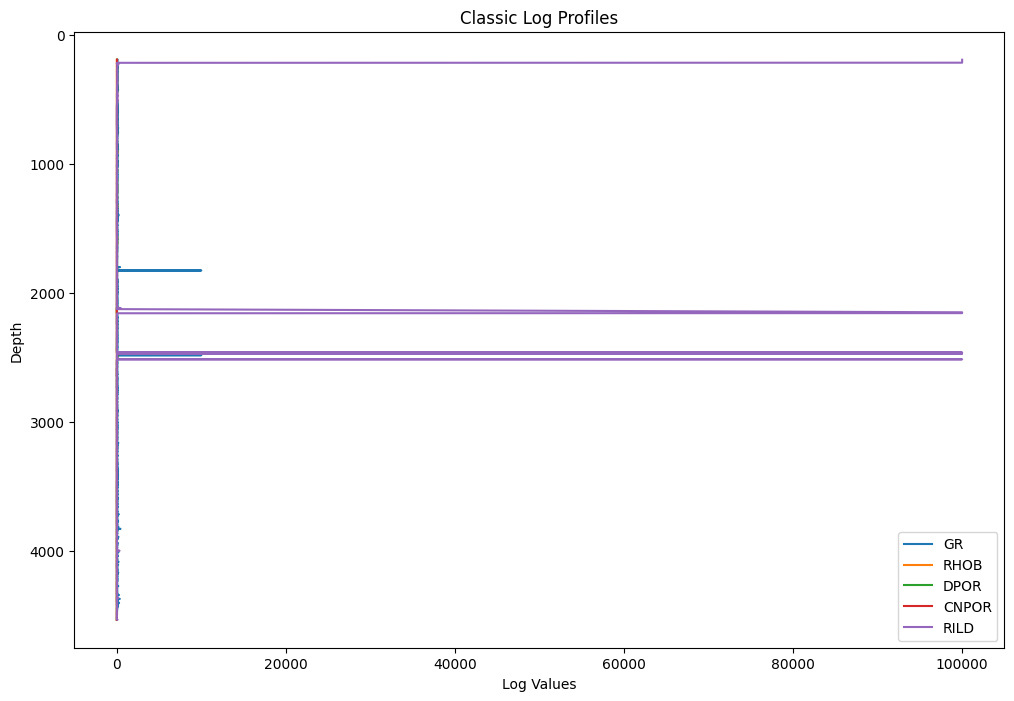

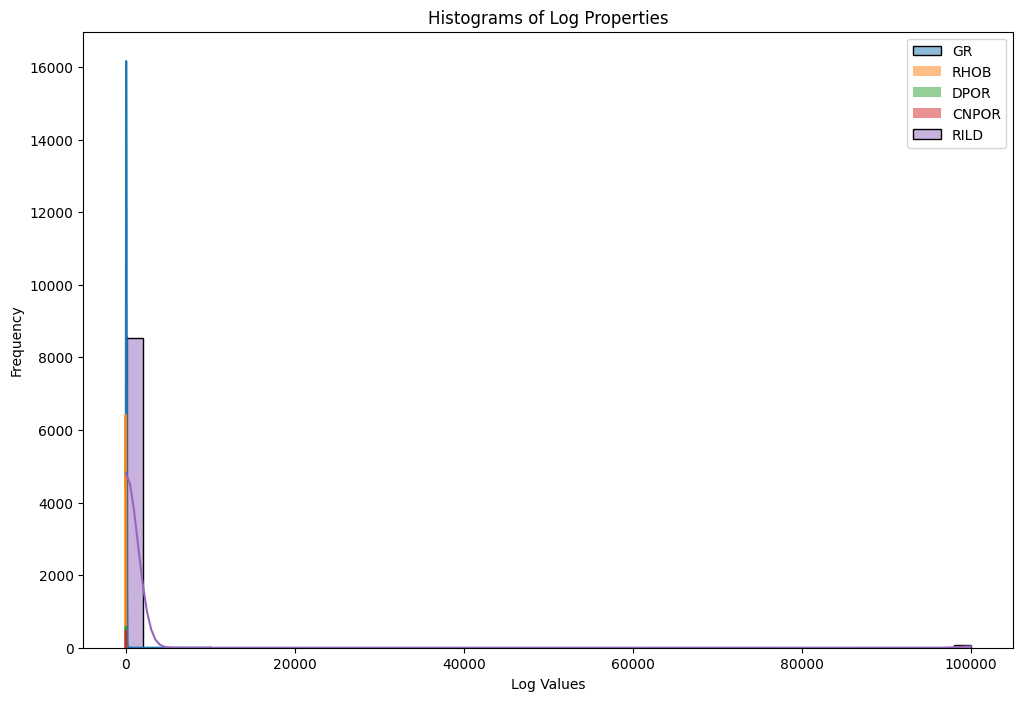

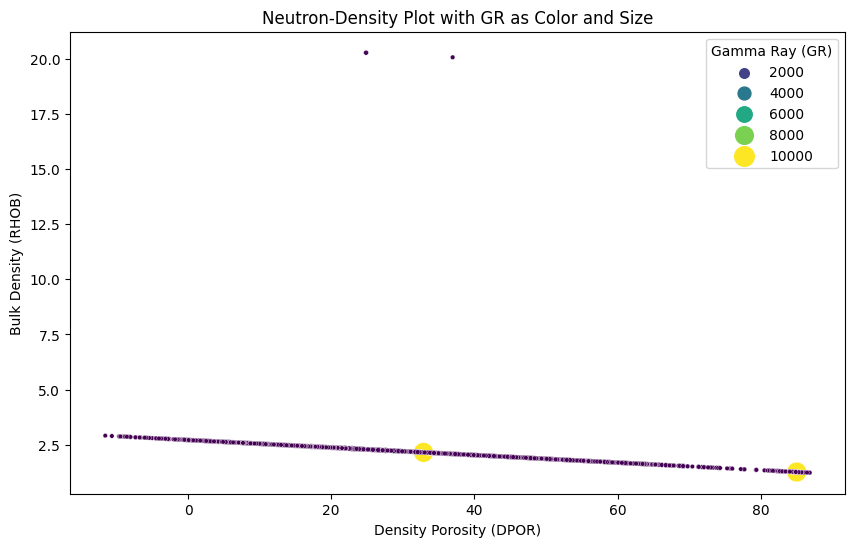

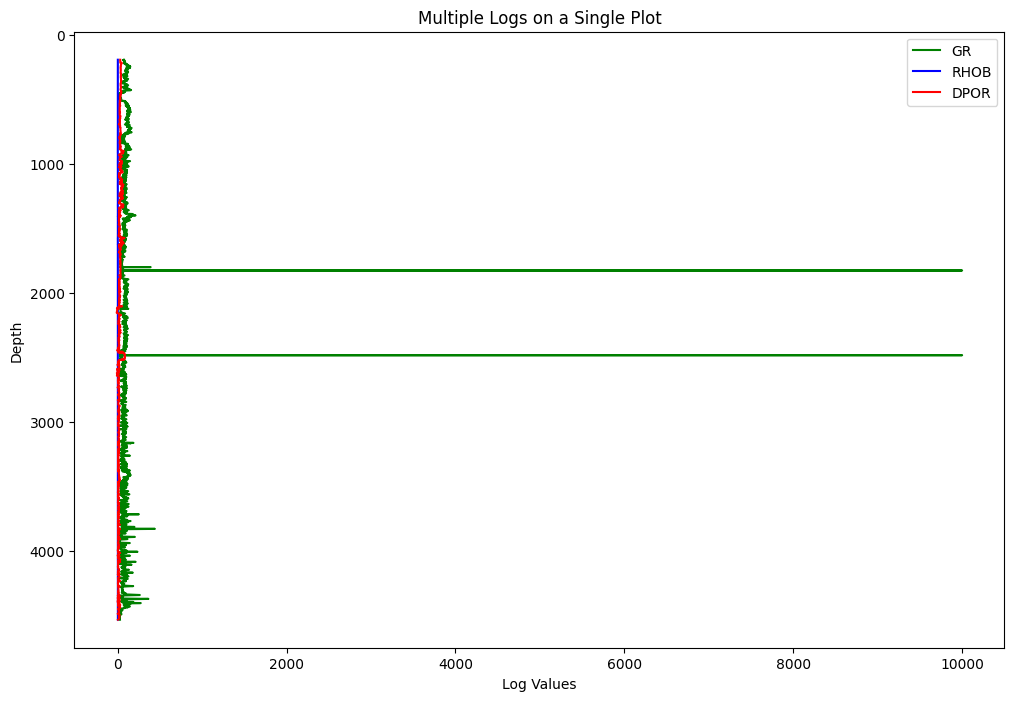

In [ ]:
# Assuming your DataFrame is named 'df'

# Classic Log Profiles
logs_to_plot = ['GR', 'RHOB', 'DPOR', 'CNPOR', 'RILD']
plt.figure(figsize=(12, 8))
for log in logs_to_plot:
    plt.plot(df[log], df['DEPT'], label=log)

plt.gca().invert_yaxis()  # Invert y-axis for depth
plt.title('Classic Log Profiles')
plt.xlabel('Log Values')
plt.ylabel('Depth')
plt.legend()
plt.show()

# Histograms of Log Properties
plt.figure(figsize=(12, 8))
for log in logs_to_plot:
    sns.histplot(df[log], bins=50, kde=True, label=log)

plt.title('Histograms of Log Properties')
plt.xlabel('Log Values')
plt.ylabel('Frequency')
plt.legend()
plt.show()



# Neutron-Density Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='DPOR', y='RHOB', data=df, hue='GR', palette='viridis', size='GR', sizes=(10, 200))
plt.title('Neutron-Density Plot with GR as Color and Size')
plt.xlabel('Density Porosity (DPOR)')
plt.ylabel('Bulk Density (RHOB)')
plt.legend(title='Gamma Ray (GR)', bbox_to_anchor=(1, 1))
plt.show()

# Putting Multiple Logs on a Single Plot
plt.figure(figsize=(12, 8))
plt.plot(df['GR'], df['DEPT'], label='GR', color='green')
plt.plot(df['RHOB'], df['DEPT'], label='RHOB', color='blue')
plt.plot(df['DPOR'], df['DEPT'], label='DPOR', color='red')

plt.gca().invert_yaxis()
plt.title('Multiple Logs on a Single Plot')
plt.xlabel('Log Values')
plt.ylabel('Depth')
plt.legend()
plt.show()


Net-to-Gross Ratio: 0.8071195905072126


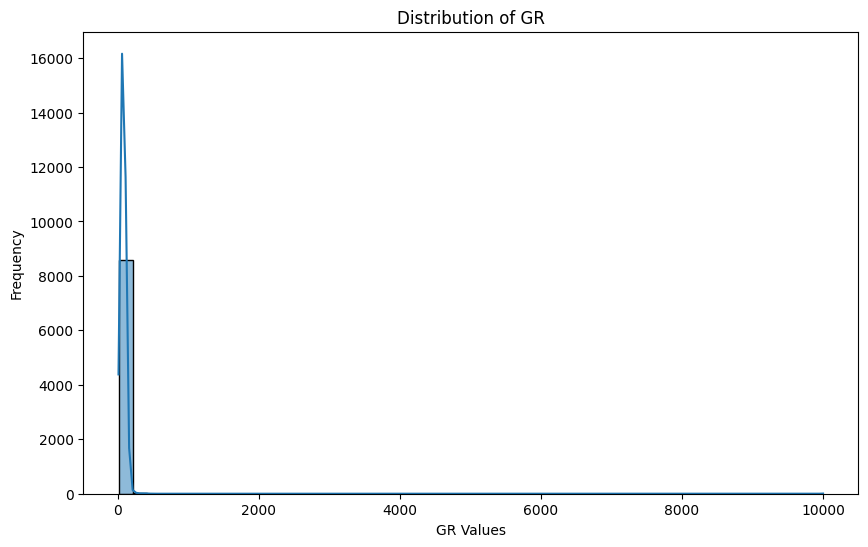

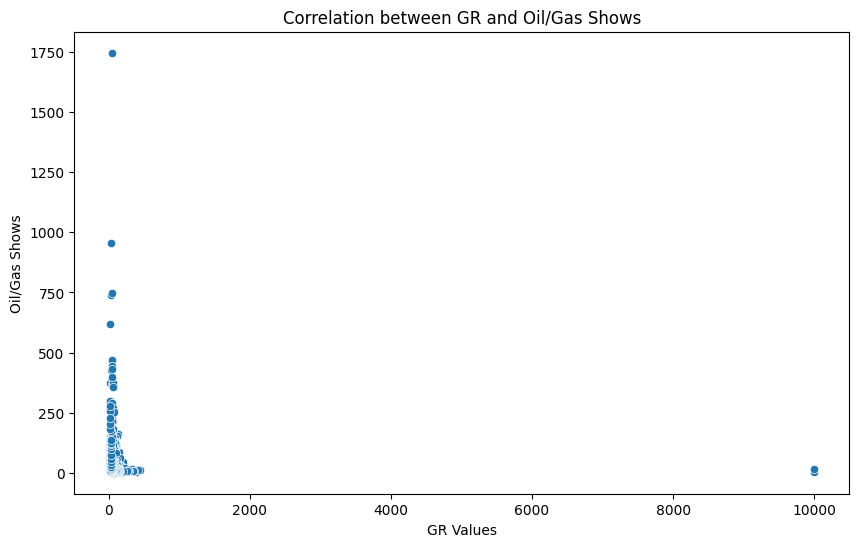

In [ ]:
# 2. V-Shale Cutoff and Net-to-Gross
v_shale_cutoff = 50  # Example cutoff value for GR
df['Above_V_Shale_Cutoff'] = np.where(df['GR'] > v_shale_cutoff, 1, 0)
net_to_gross_ratio = df['Above_V_Shale_Cutoff'].mean()
print(f"Net-to-Gross Ratio: {net_to_gross_ratio}")

# 3. High-Quality Reservoir Facies (GR)
plt.figure(figsize=(10, 6))
sns.histplot(df['GR'], bins=50, kde=True)
plt.title('Distribution of GR')
plt.xlabel('GR Values')
plt.ylabel('Frequency')
plt.show()

# 4. Correlating GR with Oil/Gas Shows
plt.figure(figsize=(10, 6))
sns.scatterplot(x='GR', y='RLL3', data=df)
plt.title('Correlation between GR and Oil/Gas Shows')
plt.xlabel('GR Values')
plt.ylabel('Oil/Gas Shows')
plt.show()


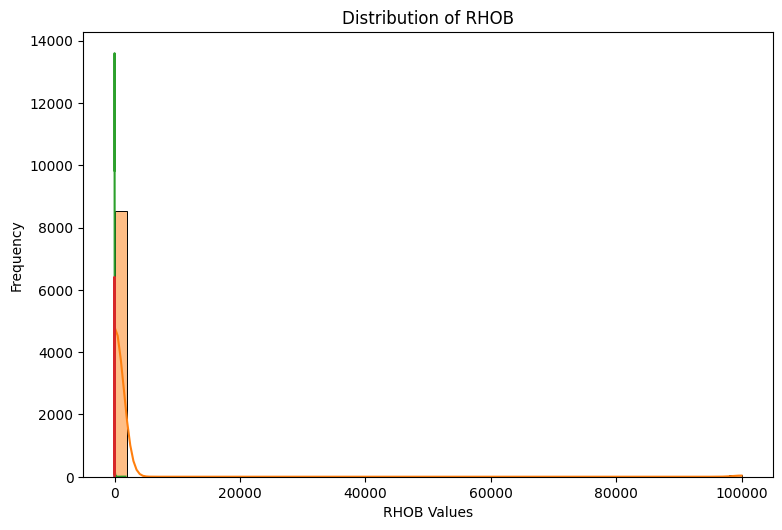

In [ ]:
# 5. Distributional Form of Various Log Properties
plt.figure(figsize=(15, 10))
for column in ['CNPOR', 'RILD','RLL3', 'RHOB']:
    plt.subplot(2, 2, 1)
    sns.histplot(df[column], bins=50, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(f'{column} Values')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

In [ ]:
# 6. Locating Correlateable Properties (Linear Regression)
correlation_columns = ['CNPOR', 'RHOB']
correlation_df = df[correlation_columns + ['RLL3']].dropna()
X = correlation_df[correlation_columns]
y = correlation_df['RLL3']

model = LinearRegression()
model.fit(X, y)
print('Linear Regression Coefficients:')
for col, coef in zip(correlation_columns, model.coef_):
    print(f"{col}: {coef}")


Linear Regression Coefficients:
CNPOR: -0.9772143304451982
RHOB: -1.24318154490614


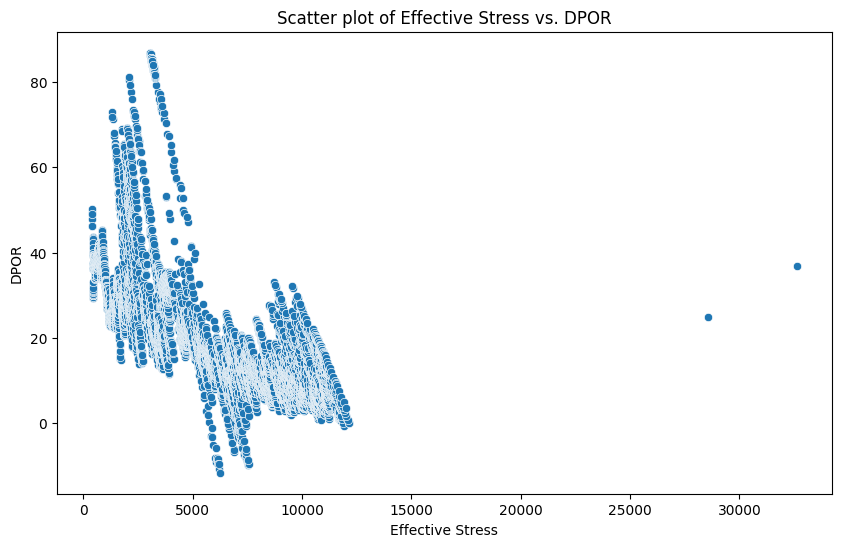

In [ ]:
# 7. Bespoke Functions
def calculate_effective_stress(df):
    df['EffectiveStress'] = df['RHOB'] * df['DEPT']
    return df

df = calculate_effective_stress(df)

# 8. Data Visualization (Additional)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='EffectiveStress', y='DPOR', data=df)
plt.title('Scatter plot of Effective Stress vs. DPOR')
plt.xlabel('Effective Stress')
plt.ylabel('DPOR')
plt.show()